# 쿠팡 주문목록
- 2024-03-17
- 고객센터에 5년치의 상세 구매내역을 엑셀로 줄 수 있는지 문의했지만, 고객센터나 메일을 통해선ㄴ 개인정보의 위험으로 인해 불가능하다고 답변을 받음
- 그래서 쿠팡 주문목록을 크롤링해서 데이터를 수집함
- 크롤링 코드를 작성하기 보다 크롬 익스텐션을 사용하여 빨리 수집한 뒤, 전처리하는 것이 더 효율적이라고 생각함
    - 단점은 한번에 주문한 제품이 6개 이상인 경우, 6개까지만 수집됨 => 이 부분은 감안하고 진행함. 셀레니움이나 다른 도구를 써봤지만 크롤링의 경우 쿠팡에서 막아놔서 크롬 익스텐션을 사용함
- 다만, 크롤링 결과가 전처리가 많이 필요한 상태임

In [1]:
import pandas as pd
import datetime 

today = datetime.date.today()
today = today.strftime("%Y-%m-%d")
print(today)

2025-03-18


In [2]:
df = pd.read_excel('../data/2020-2025.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   sc-abukv2-1          328 non-null    object
 1   sc-abukv2-3          328 non-null    object
 2   sc-755zt3-0          321 non-null    object
 3   sc-755zt3-0 2        296 non-null    object
 4   sc-1uwk3m0-0 href    328 non-null    object
 5   sc-1uwk3m0-0 src     328 non-null    object
 6   sc-gnmni8-10 href    328 non-null    object
 7   sc-18r141d-0 src     308 non-null    object
 8   sc-755zt3-1          328 non-null    object
 9   sc-755zt3-0 3        327 non-null    object
 10  sc-755zt3-0 4        327 non-null    object
 11  sc-1k9quwu-0         329 non-null    object
 12  sc-1uwk3m0-0 href 2  155 non-null    object
 13  sc-1uwk3m0-0 src 2   156 non-null    object
 14  sc-gnmni8-10 href 2  155 non-null    object
 15  sc-18r141d-0 src 2   143 non-null    object
 16  sc-755zt

In [3]:
import re
# Drop columns containing specific patterns
pattern = re.compile(r'sc-1k9quwu-0|sc-18r141d-0')
columns_to_drop = [col for col in df.columns if pattern.search(col)]
df.drop(columns=columns_to_drop, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   sc-abukv2-1          328 non-null    object
 1   sc-abukv2-3          328 non-null    object
 2   sc-755zt3-0          321 non-null    object
 3   sc-755zt3-0 2        296 non-null    object
 4   sc-1uwk3m0-0 href    328 non-null    object
 5   sc-1uwk3m0-0 src     328 non-null    object
 6   sc-gnmni8-10 href    328 non-null    object
 7   sc-755zt3-1          328 non-null    object
 8   sc-755zt3-0 3        327 non-null    object
 9   sc-755zt3-0 4        327 non-null    object
 10  sc-1uwk3m0-0 href 2  155 non-null    object
 11  sc-1uwk3m0-0 src 2   156 non-null    object
 12  sc-gnmni8-10 href 2  155 non-null    object
 13  sc-755zt3-1 2        168 non-null    object
 14  sc-755zt3-0 5        156 non-null    object
 15  sc-755zt3-0 6        156 non-null    object
 16  sc-1uwk3

In [4]:
tmp1 = df[['sc-abukv2-1',  'sc-1uwk3m0-0 href', 'sc-1uwk3m0-0 src', 'sc-gnmni8-10 href', 'sc-755zt3-1', 'sc-755zt3-0 3', 'sc-755zt3-0 4']]
tmp2 = df[['sc-abukv2-1', 'sc-1uwk3m0-0 href 2', 'sc-1uwk3m0-0 src 2', 'sc-gnmni8-10 href 2', 'sc-755zt3-1 2', 'sc-755zt3-0 5', 'sc-755zt3-0 6']]
tmp3 = df[['sc-abukv2-1', 'sc-1uwk3m0-0 href 3', 'sc-1uwk3m0-0 src 3', 'sc-gnmni8-10 href 3', 'sc-755zt3-1 3', 'sc-755zt3-0 7', 'sc-755zt3-0 8']]
tmp4 = df[['sc-abukv2-1', 'sc-1uwk3m0-0 href 4', 'sc-1uwk3m0-0 src 4', 'sc-gnmni8-10 href 4', 'sc-755zt3-1 4', 'sc-755zt3-0 9', 'sc-755zt3-0 10']]

In [5]:
df_list = [tmp1, tmp2, tmp3, tmp4]

refine_df = pd.DataFrame()
for tmp in df_list:
    tmp.columns = ['주문일자', '이미지_바로가기링크', '이미지_링크', '제목_바로가기링크', '상품명', '가격', '수량']
    tmp = tmp.dropna(subset=['이미지_바로가기링크']).dropna(subset=['가격'])
    refine_df = pd.concat([refine_df, tmp])
refine_df.reset_index(drop=True, inplace=True)
refine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   주문일자        657 non-null    object
 1   이미지_바로가기링크  657 non-null    object
 2   이미지_링크      657 non-null    object
 3   제목_바로가기링크   657 non-null    object
 4   상품명         657 non-null    object
 5   가격          657 non-null    object
 6   수량          657 non-null    object
dtypes: object(7)
memory usage: 36.1+ KB


In [6]:
refine_df = refine_df[['주문일자', '상품명', '가격', '수량', '이미지_바로가기링크', '이미지_링크', '제목_바로가기링크']]
# 데이터 전처리
refine_df["주문일자"] = pd.to_datetime(refine_df["주문일자"].str.replace(" 주문", ""), format="%Y. %m. %d")
refine_df["가격"] = refine_df["가격"].str.replace(" 원", "").str.replace(",", "").astype(int)
refine_df["수량"] = refine_df["수량"].str.replace("개", "").astype(int)
refine_df.sort_values(by='주문일자', ascending=False, inplace=True)
refine_df.reset_index(drop=True, inplace=True)
refine_df.head()

,주문일자,상품명,가격,수량,이미지_바로가기링크,이미지_링크,제목_바로가기링크
0,2025-03-14,"에바 실리콘 작업판, 라지(600 X 460 mm), 1개",13590,1,https://mc.coupang.com/ssr/sdp/link?vendorItem...,https://thumbnail.coupangcdn.com/thumbnails/re...,https://mc.coupang.com/ssr/sdp/link?vendorItem...
1,2025-03-14,"천미방 이명기 옥수수 국수, 1kg, 1개",4490,1,https://mc.coupang.com/ssr/sdp/link?vendorItem...,https://thumbnail.coupangcdn.com/thumbnails/re...,https://mc.coupang.com/ssr/sdp/link?vendorItem...
2,2025-03-14,"백설 사골 육수에는 1분링, 200g, 1개",7700,1,https://mc.coupang.com/ssr/sdp/link?vendorItem...,https://thumbnail.coupangcdn.com/thumbnails/re...,https://mc.coupang.com/ssr/sdp/link?vendorItem...
3,2025-03-14,"눈금있는 조절 가능한 스텐 밀대, 1세트, 43 x 6.5 cm",16750,1,https://mc.coupang.com/ssr/sdp/link?vendorItem...,https://thumbnail.coupangcdn.com/thumbnails/re...,https://mc.coupang.com/ssr/sdp/link?vendorItem...
4,2025-03-05,"테프론시트, 500 x 340 mm, 1개",2500,1,https://mc.coupang.com/ssr/sdp/link?vendorItem...,https://thumbnail.coupangcdn.com/thumbnails/re...,https://mc.coupang.com/ssr/sdp/link?vendorItem...


In [7]:
refine_df.to_csv(f'../data/coupang_refined_2020-01-01_2025-03-17.csv', index=False, encoding='utf-8-sig')

In [ ]:
# import requests
# headers = {
#     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"
# }
# url = refine_df['제목_바로가기링크'][0]
# response = requests.get(url, headers=headers)
# print(response)

## EDA

In [9]:
refine_df.describe(include='all')

,주문일자,상품명,가격,수량,이미지_바로가기링크,이미지_링크,제목_바로가기링크
count,657,657,657.000000,657.000000,657,657,657
unique,NaN,508,NaN,NaN,501,496,501
top,NaN,"탐사수, 1L, 12개",NaN,NaN,https://mc.coupang.com/ssr/sdp/link?vendorItem...,https://thumbnail.coupangcdn.com/thumbnails/re...,https://mc.coupang.com/ssr/sdp/link?vendorItem...
freq,NaN,16,NaN,NaN,16,16,16
mean,2022-11-30 14:45:28.767123200,NaN,12860.744292,1.016743,NaN,NaN,NaN
min,2020-02-22 00:00:00,NaN,643.000000,1.000000,NaN,NaN,NaN
25%,2021-04-16 00:00:00,NaN,4320.000000,1.000000,NaN,NaN,NaN
50%,2023-05-13 00:00:00,NaN,7400.000000,1.000000,NaN,NaN,NaN
75%,2024-04-16 00:00:00,NaN,11900.000000,1.000000,NaN,NaN,NaN
max,2025-03-14 00:00:00,NaN,495880.000000,3.000000,NaN,NaN,NaN


In [ ]:
# 데이터 시각화: 연도별 총 구매금액
import matplotlib.pyplot as plt
import seaborn as sns

refine_df['총_구매금액'] = refine_df['가격'] * refine_df['수량']
refine_df['연도'] = refine_df['주문일자'].dt.year



,주문일자,상품명,가격,수량,이미지_바로가기링크,이미지_링크,제목_바로가기링크,총_구매금액,연도
0,2025-03-14,"에바 실리콘 작업판, 라지(600 X 460 mm), 1개",13590,1,https://mc.coupang.com/ssr/sdp/link?vendorItem...,https://thumbnail.coupangcdn.com/thumbnails/re...,https://mc.coupang.com/ssr/sdp/link?vendorItem...,13590,2025
1,2025-03-14,"천미방 이명기 옥수수 국수, 1kg, 1개",4490,1,https://mc.coupang.com/ssr/sdp/link?vendorItem...,https://thumbnail.coupangcdn.com/thumbnails/re...,https://mc.coupang.com/ssr/sdp/link?vendorItem...,4490,2025
2,2025-03-14,"백설 사골 육수에는 1분링, 200g, 1개",7700,1,https://mc.coupang.com/ssr/sdp/link?vendorItem...,https://thumbnail.coupangcdn.com/thumbnails/re...,https://mc.coupang.com/ssr/sdp/link?vendorItem...,7700,2025
3,2025-03-14,"눈금있는 조절 가능한 스텐 밀대, 1세트, 43 x 6.5 cm",16750,1,https://mc.coupang.com/ssr/sdp/link?vendorItem...,https://thumbnail.coupangcdn.com/thumbnails/re...,https://mc.coupang.com/ssr/sdp/link?vendorItem...,16750,2025
4,2025-03-05,"테프론시트, 500 x 340 mm, 1개",2500,1,https://mc.coupang.com/ssr/sdp/link?vendorItem...,https://thumbnail.coupangcdn.com/thumbnails/re...,https://mc.coupang.com/ssr/sdp/link?vendorItem...,2500,2025


In [21]:
# 5년간 총 구매금액
print(refine_df['총_구매금액'].sum())

8515585


Text(0, 0.5, 'Sum Price')

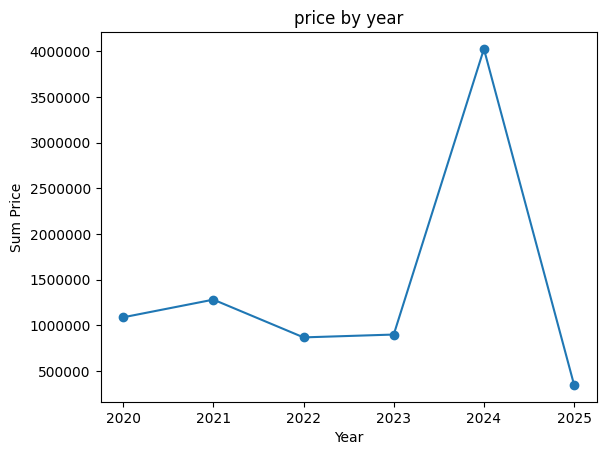

In [20]:
sum_price = refine_df.groupby('연도')['총_구매금액'].sum()
sum_price
# 지수표현 없이 그래프 출력
plt.ticklabel_format(style='plain')
plt.plot(sum_price.index, sum_price.values, marker='o')
plt.title('price by year')
plt.xlabel('Year')
plt.ylabel('Sum Price')